In [1]:
def get_figsize(im):
    # What size does the figure need to be in inches to fit the image?
    dpi = plt.rcParams['figure.dpi']
    dim = im.shape
    figuresize = dim[1]/float(dpi), dim[0]/float(dpi)
    return(figuresize)

In [2]:
def display_image_actual_size_single(im_data):
    figuresize = get_figsize(im_data)
    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figuresize)
    # Add the single axis to fit the image to the screen boundary
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(im_data, cmap='gray')
    ax.axis('off')
    plt.show()
    return(fig)

In [18]:
import cv2 #import OpenCV
from matplotlib import pyplot as plt #import python plot graph
import matplotlib as mpl #import math library from python
import numpy as np
im = cv2.imread('dog.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)


# fig = display_image_actual_size_single(im)
# fig = display_image_actual_size_single(blurBox)


In [4]:
# fig = display_image_actual_size_single(BlurGauss)

In [5]:
# blur = cv2.blur(im,(5,5))
# fig = display_image_actual_size_single(blur)

In [6]:
def saltpepper_noise(image, prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [7]:
imSP1 = saltpepper_noise(im,0.0075)         #Add noise, 'prob' controls how much noise is added
blurBox3 = cv2.boxFilter(imSP1, -1, (3,3))
# fig = display_image_actual_size_single(blurBox3) 

In [23]:

medianFiltered = cv2.medianBlur(im,5)   #Apply a median filter to of size ‘sz’

# fig = display_image_actual_size_single(imSP)


In [9]:
imSP2 = saltpepper_noise(im,0.25)  
medianFilteredimSP = cv2.medianBlur(imSP2,15)   #Apply a median filter to of size ‘sz’
# fig = display_image_actual_size_single(medianFilteredimSP)

In [10]:
# fig = display_image_actual_size_single(medianFiltered)

In [11]:
sobeledgeH = cv2.Sobel(im, -1, 0, 1, ksize=5)   #horizontal edges, changes in the y direction
sobeledgeV = cv2.Sobel(im, -1, 1, 0, ksize=5)   #vertical edges, changes in the x direction
# fig = display_image_actual_size_single(sobeledgeH)

In [12]:
# fig = display_image_actual_size_single(sobeledgeV)

In [13]:
sobeledgeHV = cv2.Sobel(im, -1, 1, 1, ksize=7)   #vertical edges, changes in the x direction
# fig = display_image_actual_size_single(sobeledgeHV)

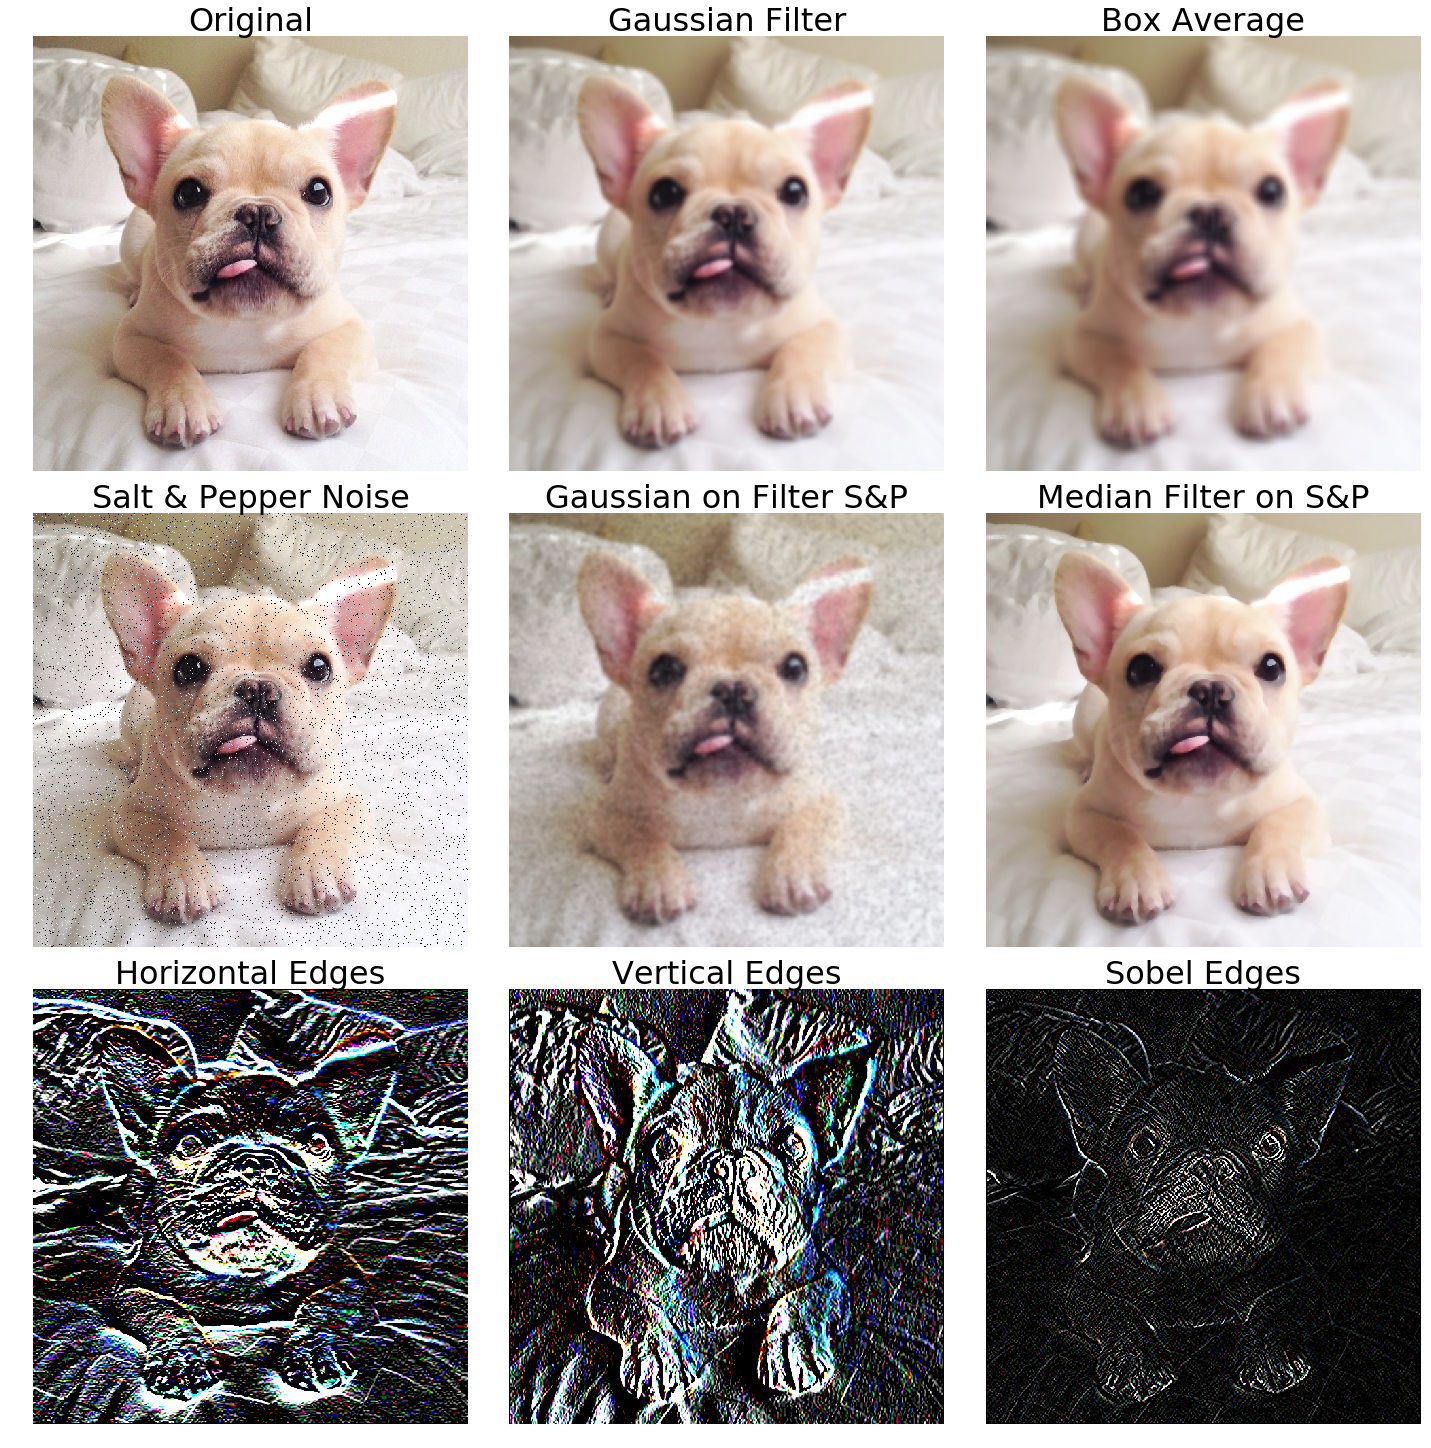

In [71]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))
plt.tight_layout()
# Original
axes[0,0].imshow(im)
axes[0,0].set_title("Original", fontsize=32)
axes[0,0].axis('off')


# Gaussian
BlurGauss = cv2.GaussianBlur(im, (15,15), 0)
axes[0,1].imshow(BlurGauss)
axes[0,1].set_title("Gaussian Filter", fontsize=32)
axes[0,1].axis('off')


# Box Average
blurBox = cv2.boxFilter(im, -1, (15,15))
axes[0,2].imshow(blurBox)
axes[0,2].set_title("Box Average", fontsize=32)
axes[0,2].axis('off')


# Salt & Pepper
imSP = saltpepper_noise(im,0.025)         #Add noise, 'prob' controls how much noise is added
axes[1,0].imshow(imSP)
axes[1,0].set_title("Salt & Pepper Noise", fontsize=32)
axes[1,0].axis('off')


# Gaussian on Filter S&P
imblurSP4 = saltpepper_noise(im,0.0625)         #Add noise, 'prob' controls how much noise is added
BlurGauss2 = cv2.GaussianBlur(imblurSP4, (15,15), 0)
axes[1,1].imshow(BlurGauss2)
axes[1,1].set_title("Gaussian on Filter S&P", fontsize=32)
axes[1,1].axis('off')

# Median Filter on S&P
imSP2 = saltpepper_noise(im,0.0625)  
medianFilteredimSP = cv2.medianBlur(imSP2,7)   #Apply a median filter to of size ‘sz’
axes[1,2].imshow(medianFilteredimSP)
axes[1,2].set_title("Median Filter on S&P", fontsize=32)
axes[1,2].axis('off')

# Horizontal Edges
sobeledgeH = cv2.Sobel(im, -1, 0, 1, ksize=5)   #horizontal edges, changes in the y direction
axes[2,0].imshow(sobeledgeH)
axes[2,0].set_title("Horizontal Edges", fontsize=32)
axes[2,0].axis('off')

# Vertical Edges
sobeledgeV = cv2.Sobel(im, -1, 1, 0, ksize=5) #vertical edges, changes in the x direction
axes[2,1].imshow(sobeledgeV)
axes[2,1].set_title("Vertical Edges", fontsize=32)
axes[2,1].axis('off')

# Sobel Edges
sobeledgeHV = cv2.Sobel(im, -1, 1, 1, ksize=5)   #sobel edges, changes in the x direction
axes[2,2].imshow(sobeledgeHV)
axes[2,2].set_title("Sobel Edges", fontsize=32)
axes[2,2].axis('off')
fig.savefig("Lab4Ex1.jpg", bbox_inches='tight')